In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [58]:
df = pd.read_csv('cardio_train.csv', sep = ';')
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
39399,56281,20172,2,163,61.0,115,75,1,1,1,0,1,0
52199,74452,16126,2,176,94.0,110,85,2,2,0,0,1,1
62395,89104,22534,1,162,61.0,140,80,1,1,0,0,1,0
50153,71569,21242,1,161,56.0,110,70,1,1,0,1,0,1
27143,38803,18748,1,164,71.0,140,90,2,1,0,0,1,0
12984,18510,20992,1,160,82.0,120,80,1,3,0,0,1,0
73,100,21934,1,157,77.0,140,90,1,1,0,0,1,1
64076,91472,21339,1,159,81.0,120,80,3,3,0,0,1,0
45374,64824,21089,2,169,86.0,140,80,1,1,0,0,0,1
28106,40187,22001,1,159,71.0,120,80,2,2,0,0,1,1


In [8]:
#drop id column
df1 = df.drop(columns = ['id'])
df1

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
#Convert age to years
df1['age'] = df1['age'].map(lambda x: round(x/365))
df1.sample(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4169,52,2,177,87.0,110,80,1,1,0,0,1,1
2134,50,1,161,73.0,150,100,1,2,0,0,1,0
35172,54,1,170,73.0,140,90,1,1,0,0,1,1
7442,40,1,163,66.0,130,80,1,1,0,0,1,1
65114,44,1,160,72.0,120,80,1,1,0,0,1,0
29855,46,2,167,75.0,120,80,1,1,0,0,1,1
1029,40,1,160,59.0,120,80,1,2,0,0,1,0
51366,64,1,162,78.0,140,90,1,1,0,0,1,1
6795,56,1,158,92.0,140,90,1,2,0,0,0,1
5874,60,2,167,98.0,150,1000,1,1,0,0,1,1


In [10]:
#Check for missing variables
df1.isnull().sum().sum()


0

In [11]:
df1.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df11 = df1.copy()

* columns api_hi and column api_lo data is skewed indicating presense of outliers
* Minimum weight is 14, which does not make sense when its considered that minum age of the population in the data is 30


In [13]:
#To remove outliers in weight, height, api_hi and api_lo below function is used
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [14]:
# Index List of Non-Outliers from height
nonOutlierList = Remove_Outlier_Indices(df1['height'])
# Non-Outlier Subset of the Given Dataset
dfSubset = df1[nonOutlierList]
dfSubset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
# Index List of Non-Outliers from Weight
nonOutlierList = Remove_Outlier_Indices(dfSubset['weight'])
# Non-Outlier Subset of the Given Dataset
dfSubset = dfSubset[nonOutlierList]
dfSubset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
# Index List of Non-Outliers from ap_hi
nonOutlierList = Remove_Outlier_Indices(dfSubset['ap_hi'])
# Non-Outlier Subset of the Given Dataset
dfSubset = dfSubset[nonOutlierList]
dfSubset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,1
69994,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
# Index List of Non-Outliers from ap_lo
nonOutlierList = Remove_Outlier_Indices(dfSubset['ap_lo'])
# Non-Outlier Subset of the Given Dataset
dfSubset = dfSubset[nonOutlierList]
dfSubset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
5,60,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,1
69994,58,1,165,80.0,150,80,1,1,0,0,1,1
69995,53,2,168,76.0,120,80,1,1,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [18]:
dfSubset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000
mean,53.406032,1.348564,164.406144,73.180776,126.419870,81.698904,1.357699,1.220638,0.086345,0.052172,0.804320,0.493880
std,6.741913,0.476519,7.531365,12.272097,14.289834,7.673364,0.675192,0.567590,0.280875,0.222375,0.396727,0.499967
min,30.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_final = dfSubset.copy()

# Data Exploration

<Figure size 432x288 with 0 Axes>

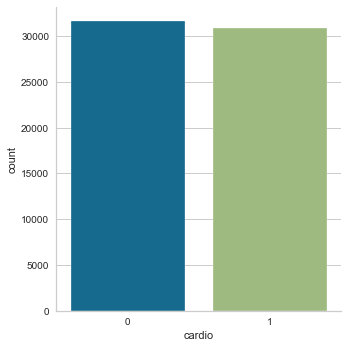

In [59]:
#Target variable proportion

plt.figure(figsize=(6,4))
sns.catplot(x="cardio", kind="count", data=df_final)
plt.show()

In [60]:
df_final['cardio'].value_counts(normalize=True)

0    0.50612
1    0.49388
Name: cardio, dtype: float64

* Plotting for continous variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


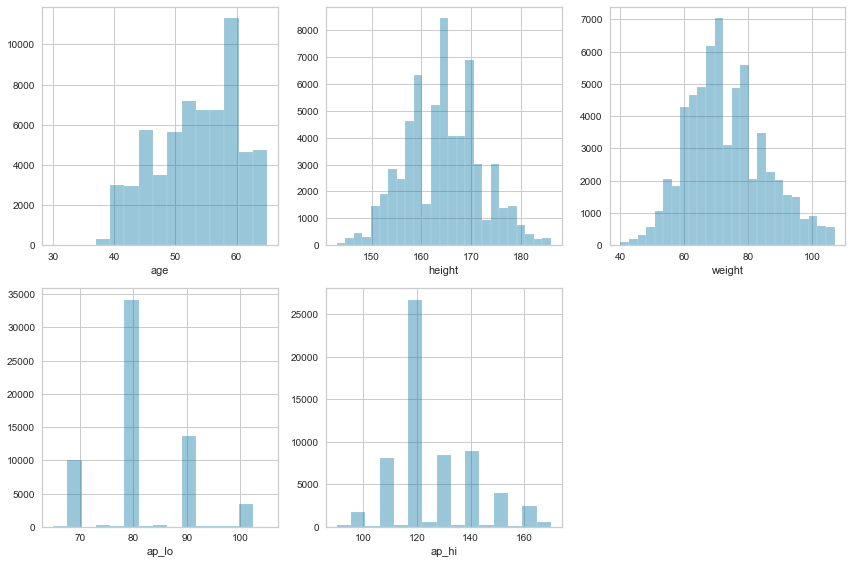

In [61]:
figure3 = plt.figure(figsize = (12,8))


plt.subplot(2,3,1)
sns.distplot(df_final['age'], bins=15, kde=False)

plt.subplot(2,3,2)
sns.distplot(df_final['height'], bins=25, kde=False)

plt.subplot(2,3,3)
sns.distplot(df_final['weight'], bins=25, kde=False)

plt.subplot(2,3,4)
sns.distplot(df_final['ap_lo'], bins=15, kde=False)

plt.subplot(2,3,5)
sns.distplot(df_final['ap_hi'], bins=15, kde=False)

plt.tight_layout()

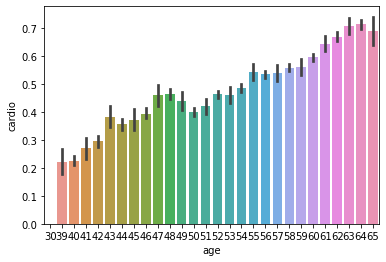

In [23]:
sns.barplot(x = 'age', y = 'cardio', data = df_final)
plt.show()

The risk of cardio attack increases with age.

<AxesSubplot:>

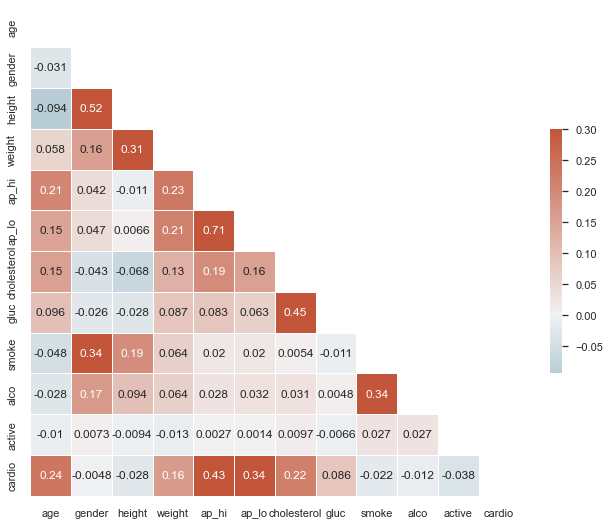

In [62]:
sns.set_theme(style="white")
corr = df_final.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Modelling

In [45]:
#Splitting Data into test and train set
#output
y= df_final.cardio 
#input
x=df_final.drop('cardio',axis=1) 
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 
#printing shapes of testing and training sets :
print("shape of original dataset :", df_final.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (62505, 12)
shape of input - training set (43753, 11)
shape of output - training set (43753,)
shape of input - testing set (18752, 11)
shape of output - testing set (18752,)


# Clustering

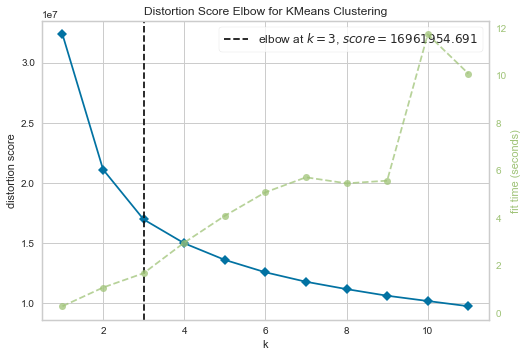

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
#Determining Number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_final)
visualizer.show()

In the above figure, the optimal number of clusters (k) is plotted against the distortion (total of within-cluster sum of squares for a given number of k). The optimal number of k is a point where there is a bend in the curve (elbow or knee). Based on the elbow method, the optimal number of clusters (k) is 3

In [47]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_final)

In [48]:
kmeans.labels_ 

array([0, 2, 0, ..., 1, 2, 0])

In [49]:
kmeans.inertia_

16962016.498658158

In [50]:
kmeans.n_iter_

14

In [51]:
kmeans.cluster_centers_

array([[5.24411328e+01, 1.27184123e+00, 1.62596370e+02, 6.43585440e+01,
        1.17865633e+02, 7.78806766e+01, 1.24161311e+00, 1.17151635e+00,
        6.63182428e-02, 3.88798644e-02, 8.05353485e-01, 3.28483650e-01],
       [5.32437905e+01, 1.46888086e+00, 1.67983365e+02, 8.43292778e+01,
        1.21602822e+02, 8.00275913e+01, 1.35438536e+00, 1.23788218e+00,
        1.15011759e-01, 6.74582688e-02, 7.96879481e-01, 4.42608845e-01],
       [5.52057419e+01, 1.35305002e+00, 1.63742867e+02, 7.64919918e+01,
        1.45890713e+02, 8.98916080e+01, 1.55735944e+00, 1.28572281e+00,
        9.03664796e-02, 5.87322430e-02, 8.10313955e-01, 8.26787633e-01]])

In [52]:
#Get each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 28343, 2: 16749, 1: 17413})

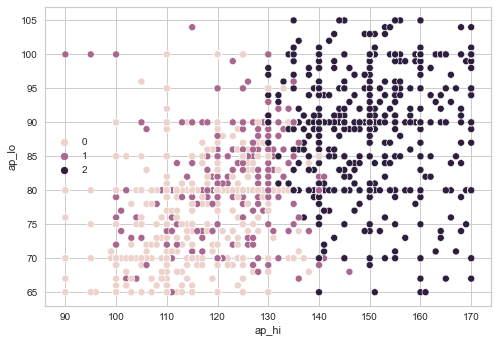

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_final, x="ap_hi", y="ap_lo", hue=kmeans.labels_)
plt.show()

# Linear Regression

In [63]:
#Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)

print(logreg.intercept_)
print(logreg.coef_)

y_pred = logreg.predict(x_test)

[-11.20282352]
[[ 0.05003423  0.00089006 -0.00903813  0.01246694  0.06196329  0.01184882
   0.50277073 -0.10739365 -0.17300031 -0.16639952 -0.25824776]]


Predicted     0     1
Actual               
0          7438  2032
1          3192  6090


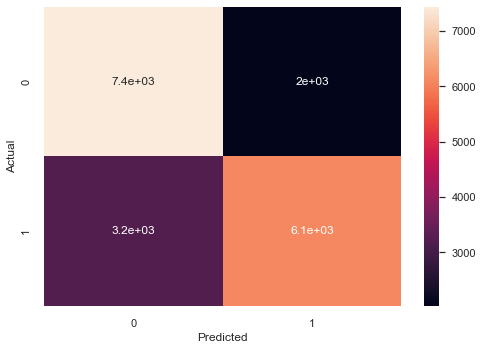

In [64]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
#Visualize CM
sns.heatmap(confusion_matrix, annot=True)
plt.show()


In [168]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7086710750853242


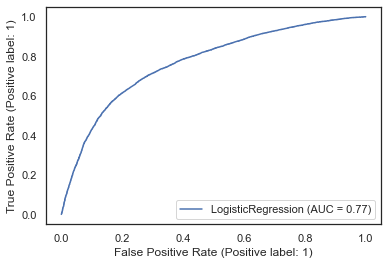

In [169]:
metrics.plot_roc_curve(logreg, x_test, y_test);

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      9527
           1       0.73      0.66      0.69      9225

    accuracy                           0.71     18752
   macro avg       0.71      0.71      0.71     18752
weighted avg       0.71      0.71      0.71     18752



# Random Forest

In [43]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfRegressor = RandomForestClassifier()
rfRegressor.fit(x_train, y_train)
y_pred1 = rfRegressor.predict(x_test)
y_pred1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

Predicted     0     1
Actual               
0          6702  2768
1          2976  6306


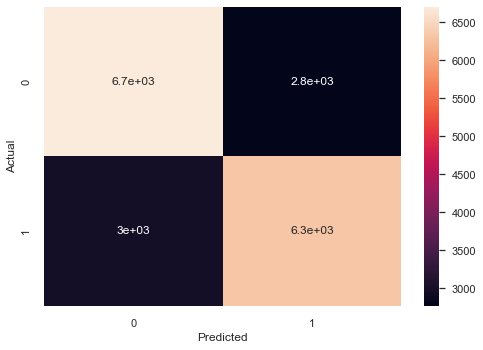

In [68]:
confusion_matrix = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
#Visualize CM
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [175]:
print(metrics.accuracy_score(y_test, y_pred1))


0.6950725255972696


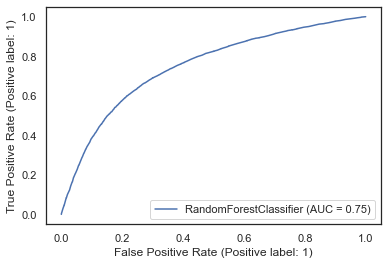

In [176]:
metrics.plot_roc_curve(rfRegressor, x_test, y_test);

* Classification Report

In [177]:
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.70      0.71      0.70      9527
           1       0.69      0.68      0.69      9225

    accuracy                           0.70     18752
   macro avg       0.70      0.69      0.69     18752
weighted avg       0.70      0.70      0.70     18752



# Selecting Features for the model


In [183]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_regression


sc = StandardScaler()

print("Feature data dimension: ", x_train.shape) 

select = SelectKBest(mutual_info_classif, k=5)

z = select.fit_transform(x_train,y_train)
 
print("After selecting best 5 features:", z.shape) 


Feature data dimension:  (43753, 11)
After selecting best 5 features: (43753, 5)


In [222]:
filter = select.get_support()
feature_names =  list(df_final.columns)
features = np.array(feature_names)

print("All features:")
print(features)

 
# keepers_idx = ftrsel.get_support()
#print(np.array(feature_names)[filter])

All features:
['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active' 'cardio']


In [209]:
np.array(feature_names)

array(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='<U11')